<a href="https://colab.research.google.com/github/DuaeZahra/sp_10-Prediction/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing required packages

In [ ]:
pip install requests pandas numpy matplotlib seaborn scikit-learn meteostat hopsworks shap pytz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.7/660.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.6/258.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install meteostat

In [ ]:
pip install hopsworks

  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
mizani 0.13.2 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


In [ ]:
!pip install "hopsworks[python]"
# pip install confluent-kafka

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 60.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pandas

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hopsworks 4.2.0 requires pandas<2.2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
pip install shap


In [ ]:
pip install pytz

## Fetching data from OpenWeather API

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from meteostat import Point, Hourly

CITY = "Lahore"
LAT, LON = 31.5497, 74.3436
API_KEY = "99150b830abb62c066787c5a95ff9ad9"
TOTAL_DAYS = 180
CHUNK_SIZE = 5

# Step 1: Fetch historical air pollution data
end_time = datetime.utcnow()
all_pollution_records = []

for _ in range(0, TOTAL_DAYS, CHUNK_SIZE):
    chunk_end = int(end_time.timestamp())
    chunk_start = int((end_time - timedelta(days=CHUNK_SIZE)).timestamp())

    print(f"[Pollution] Fetching from {datetime.utcfromtimestamp(chunk_start)} to {datetime.utcfromtimestamp(chunk_end)}")

    url = (
        f"http://api.openweathermap.org/data/2.5/air_pollution/history"
        f"?lat={LAT}&lon={LON}&start={chunk_start}&end={chunk_end}&appid={API_KEY}"
    )

    response = requests.get(url)
    if response.status_code != 200:
        print(f"[Pollution] Failed to fetch data for chunk starting {datetime.utcfromtimestamp(chunk_start)}")
        end_time -= timedelta(days=CHUNK_SIZE)
        time.sleep(1)
        continue

    data = response.json()
    for item in data.get("list", []):
        components = item["components"]
        all_pollution_records.append({
            "timestamp": datetime.utcfromtimestamp(item["dt"]),
            "pm2_5": components.get("pm2_5"),
            "pm10": components.get("pm10"),
            "no2": components.get("no2"),
            "no": components.get("no"),
            "so2": components.get("so2"),
            "o3": components.get("o3"),
            "co": components.get("co"),
            "nh3": components.get("nh3"),
            "aqi": item["main"]["aqi"]
        })

    end_time -= timedelta(days=CHUNK_SIZE)
    time.sleep(1)

df_pollution = pd.DataFrame(all_pollution_records)
df_pollution['timestamp'] = pd.to_datetime(df_pollution['timestamp'])
df_pollution = df_pollution.sort_values("timestamp")

# Step 2: Fetch weather data using Meteostat
start_date = df_pollution['timestamp'].min()
end_date = df_pollution['timestamp'].max()

lahore = Point(LAT, LON)
print(f"[Weather] Fetching from {start_date} to {end_date}")
weather_data = Hourly(lahore, start_date, end_date).fetch()

if weather_data.empty:
    raise ValueError("No weather data returned from Meteostat. Try changing the date range or check Meteostat availability.")

# Preprocess weather data
weather_data = weather_data.reset_index()
weather_data = weather_data.rename(columns={"time": "timestamp"})

# Filter and rename relevant weather features
weather_data = weather_data[[
    "timestamp", "temp", "dwpt", "rhum", "prcp", "wspd", "pres"
]].rename(columns={
    "temp": "Temp",
    "dwpt": "DewPoint",
    "rhum": "RelHumidity",
    "prcp": "Precip",
    "wspd": "WindSp",
    "pres": "Pres"
})

# Step 3: Merge pollution and weather data on timestamp
df_pollution = pd.merge_asof(
    df_pollution.sort_values("timestamp"),
    weather_data.sort_values("timestamp"),
    on="timestamp",
    direction="nearest",
    tolerance=pd.Timedelta("1h")
)

[Pollution] Fetching from 2025-04-06 21:49:00 to 2025-04-11 21:49:00
[Pollution] Fetching from 2025-04-01 21:49:00 to 2025-04-06 21:49:00
[Pollution] Fetching from 2025-03-27 21:49:00 to 2025-04-01 21:49:00
[Pollution] Fetching from 2025-03-22 21:49:00 to 2025-03-27 21:49:00
[Pollution] Fetching from 2025-03-17 21:49:00 to 2025-03-22 21:49:00
[Pollution] Fetching from 2025-03-12 21:49:00 to 2025-03-17 21:49:00
[Pollution] Fetching from 2025-03-07 21:49:00 to 2025-03-12 21:49:00
[Pollution] Fetching from 2025-03-02 21:49:00 to 2025-03-07 21:49:00
[Pollution] Fetching from 2025-02-25 21:49:00 to 2025-03-02 21:49:00
[Pollution] Fetching from 2025-02-20 21:49:00 to 2025-02-25 21:49:00
[Pollution] Fetching from 2025-02-15 21:49:00 to 2025-02-20 21:49:00
[Pollution] Fetching from 2025-02-10 21:49:00 to 2025-02-15 21:49:00
[Pollution] Fetching from 2025-02-05 21:49:00 to 2025-02-10 21:49:00
[Pollution] Fetching from 2025-01-31 21:49:00 to 2025-02-05 21:49:00
[Pollution] Fetching from 2025-01-

## General info after fetching

In [ ]:
# General info
print("\nDataframe info:")
df_pollution.info()
print(f"\nTotal records: {len(df_pollution)}")


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    4104 non-null   datetime64[ns]
 1   pm2_5        4104 non-null   float64       
 2   pm10         4104 non-null   float64       
 3   no2          4104 non-null   float64       
 4   no           4104 non-null   float64       
 5   so2          4104 non-null   float64       
 6   o3           4104 non-null   float64       
 7   co           4104 non-null   float64       
 8   nh3          4104 non-null   float64       
 9   aqi          4104 non-null   int64         
 10  Temp         4104 non-null   float64       
 11  DewPoint     4104 non-null   float64       
 12  RelHumidity  4104 non-null   float64       
 13  Precip       3877 non-null   float64       
 14  WindSp       4104 non-null   float64       
 15  Pres         4104 non-null   float64  

In [ ]:
print(df_pollution.tail())

               timestamp  pm2_5   pm10    no2   no   so2     o3      co  \
4099 2025-04-11 17:00:00  41.46  60.46   9.19  0.0  5.39  85.56  458.47   
4100 2025-04-11 18:00:00  42.94  62.89  10.66  0.0  4.87  74.23  521.60   
4101 2025-04-11 19:00:00  43.70  63.50  11.36  0.0  4.21  64.23  564.46   
4102 2025-04-11 20:00:00  44.93  64.27  11.28  0.0  3.65  56.87  601.40   
4103 2025-04-11 21:00:00  47.03  66.05  11.10  0.0  3.20  50.95  639.52   

        nh3  aqi  Temp  DewPoint  RelHumidity  Precip  WindSp    Pres  
4099  27.64    3  25.7      15.7         54.0     0.0     7.4  1003.3  
4100  31.11    3  24.9      15.2         55.0     0.0     7.4  1003.9  
4101  33.12    3  24.4      15.6         58.0     0.0     5.5  1003.9  
4102  34.56    3  23.8      15.6         60.0     0.0     3.7  1004.0  
4103  35.53    3  23.2      15.8         63.0     0.0     3.7  1004.0  


## Logging into Hopswork

In [ ]:
import hopsworks
import os

api_key = "Nlb2ywFqaAR7w07G.j0RReaMnKTpLSSAVhQbzEV9dqSf10BtIc1V2s1An1AUQRcUbk0C5YnNHk1c8Wfip"
project_name = "AQI_Dua"

os.environ["HOPSWORKS_API_KEY"] = api_key


In [ ]:
project = hopsworks.login(api_key_value=os.environ["HOPSWORKS_API_KEY"], project=project_name)
fs = project.get_feature_store()


Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1221781


## Uploading the raw dataset on Feature Store

In [ ]:
from hsfs.feature import Feature
from hsfs.feature_group import FeatureGroup

pollution_fg = fs.create_feature_group(
    name="lahore_air_quality",
    version=7,
    description="Historical air pollution data for Lahore from OpenWeather API",
    primary_key=["timestamp"],  # unique identifier
    event_time="timestamp",
    online_enabled=False
)

In [ ]:
# Ensure timestamp is in datetime format (if not already)
df_pollution["timestamp"] = pd.to_datetime(df_pollution["timestamp"])

# Insert the merged data into the feature group
pollution_fg.insert(df_pollution, write_options={"wait_for_job": True})

print("✅ Merged dataset successfully uploaded to Hopsworks.")

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1221781/fs/1210435/fg/1435107


Uploading Dataframe: 100.00% |██████████| Rows 4104/4104 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: lahore_air_quality_7_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1221781/jobs/named/lahore_air_quality_7_offline_fg_materialization/executions
✅ Merged dataset successfully uploaded to Hopsworks.


## Summary statistics after uploading

In [ ]:
# Retrieve the feature group
fg = fs.get_feature_group(name="lahore_air_quality", version=7)

# Now read the data
uploaded_df = fg.read()

print(uploaded_df.head())
print(f"\nNumber of records in feature store: {len(uploaded_df)}")

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.58s) 
                  timestamp   pm2_5    pm10     no2     no    so2     o3  \
0 2024-11-27 12:00:00+00:00  494.93  590.70  326.28  25.93  70.57   7.96   
1 2024-10-14 17:00:00+00:00  167.41  236.74   91.85  55.88  19.07   0.00   
2 2024-12-04 19:00:00+00:00  118.24  167.16   67.17   0.18  10.01  18.06   
3 2024-11-05 11:00:00+00:00  187.97  234.14  108.30   3.58  39.10  80.11   
4 2025-01-14 13:00:00+00:00  697.55  811.53  254.99  81.36  58.17   0.05   

        co    nh3  aqi  temp  dewpoint  relhumidity  precip  windsp    pres  
0  8544.92  61.30    5  23.5      12.2         49.0     0.0     0.0  1013.4  
1  4005.43  40.02    5  27.0      18.0         58.0     0.0     0.0  1010.9  
2  2243.04  23.81    5  16.0       7.0         55.0     0.0     3.6  1015.3  
3  2857.21  34.96    5  28.4      17.3         51.0     0.0     0.0  1012.9  
4  9185.79  80.05    5  17.1       7.2         52.0     0.0     0.0


## Sorting

In [ ]:
import pandas as pd

uploaded_df['timestamp'] = pd.to_datetime(uploaded_df['timestamp'])

uploaded_df = uploaded_df.sort_values(by='timestamp')
uploaded_df = uploaded_df.reset_index(drop=True)

## Exploratory Data Analysis

In [ ]:
print(uploaded_df.head(10))

                  timestamp   pm2_5    pm10     no2      no    so2      o3  \
0 2024-10-13 22:00:00+00:00  161.22  211.95  100.08    7.71  14.66    0.18   
1 2024-10-13 23:00:00+00:00  194.33  249.47  111.04    8.83  15.14    0.03   
2 2024-10-14 00:00:00+00:00  251.69  312.30  132.98   12.74  17.88    0.00   
3 2024-10-14 01:00:00+00:00  313.72  377.93  152.17   17.43  20.98    0.00   
4 2024-10-14 02:00:00+00:00  360.37  430.05  139.83   39.34  21.46    0.46   
5 2024-10-14 03:00:00+00:00  408.82  486.99  127.49   86.72  23.13    4.74   
6 2024-10-14 04:00:00+00:00  439.67  517.95  141.20  109.08  25.75   13.41   
7 2024-10-14 05:00:00+00:00  489.22  570.06  202.89   76.00  28.61   44.35   
8 2024-10-14 06:00:00+00:00  568.86  654.24  235.80   30.85  30.99  147.34   
9 2024-10-14 07:00:00+00:00  119.68  147.02   38.04    3.07  35.29  220.30   

        co    nh3  aqi  temp  dewpoint  relhumidity  precip  windsp    pres  
0  3524.78  30.15    5  23.5      17.3         68.0     0.0    

In [ ]:
# General info
print("\nDataframe info:")
uploaded_df.info()


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype                  
---  ------       --------------  -----                  
 0   timestamp    4104 non-null   datetime64[us, Etc/UTC]
 1   pm2_5        4104 non-null   float64                
 2   pm10         4104 non-null   float64                
 3   no2          4104 non-null   float64                
 4   no           4104 non-null   float64                
 5   so2          4104 non-null   float64                
 6   o3           4104 non-null   float64                
 7   co           4104 non-null   float64                
 8   nh3          4104 non-null   float64                
 9   aqi          4104 non-null   int64                  
 10  temp         4104 non-null   float64                
 11  dewpoint     4104 non-null   float64                
 12  relhumidity  4104 non-null   float64                
 13  p

### Missing vals in pm10

In [ ]:
print(uploaded_df["pm10"].isnull().sum())

0


### which feature has null vals?

In [ ]:
missing_report = uploaded_df.isnull().sum()
print(missing_report[missing_report > 0])

precip    227
dtype: int64


🔹 Option 1: Median Imputation (Recommended)
If you believe precip (precipitation) is a useful feature for predicting pm10, keep it and fill the missing values:

🔹 Option 2: Drop the column
If you're unsure about its value or it's not strongly correlated with pm10, you can just drop it:

In [ ]:
print(uploaded_df[['pm10', 'precip']].corr())

           pm10   precip
pm10    1.00000 -0.07514
precip -0.07514  1.00000


In [ ]:
uploaded_df = uploaded_df.drop(columns=['precip'])

### Target Distribution (pm10)

🔍 Why?

Check if pm10 is skewed → apply log transformation if needed.

Helps decide on model type (some regressors assume normality).


2. Interpretation of Predictions:
After applying the log transformation, your model will predict the log-transformed values. If you want to interpret the predictions in the original scale (i.e., the actual values of pm10), you'll need to reverse the transformation.

To reverse the log transformation, you can use the exponential function:

predicted_pm10 = np.expm1(predicted_pm10_log)  


Text(0.5, 1.0, 'Distribution of PM10')

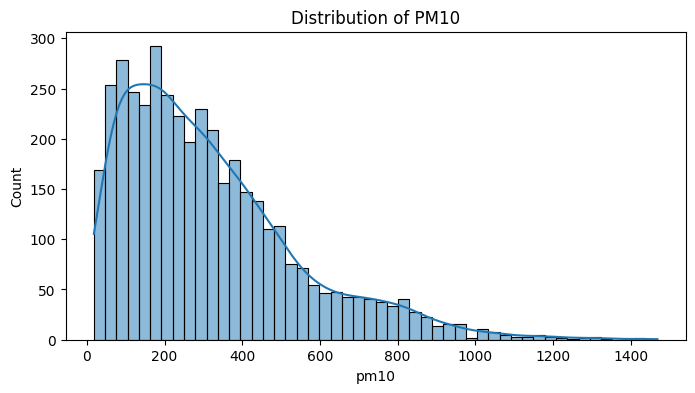

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(uploaded_df['pm10'], bins=50, kde=True)
plt.title('Distribution of PM10')

### Log Transformation of PM10 (to reduce skewness)

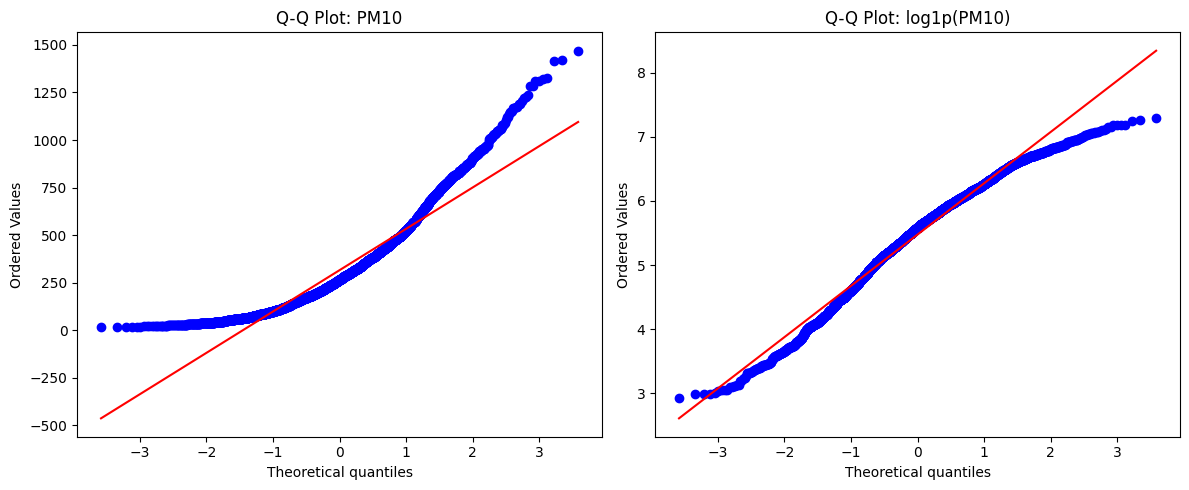

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Apply log transformation to pm10
uploaded_df['pm10_log'] = np.log1p(uploaded_df['pm10'])  # log(1 + x) to handle zero values as well

# Create the subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original PM10
stats.probplot(uploaded_df['pm10'], dist="norm", plot=ax[0])
ax[0].set_title("Q-Q Plot: PM10")

# Log-transformed PM10
stats.probplot(uploaded_df['pm10_log'], dist="norm", plot=ax[1])
ax[1].set_title("Q-Q Plot: log1p(PM10)")

# Show the plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of PM10')

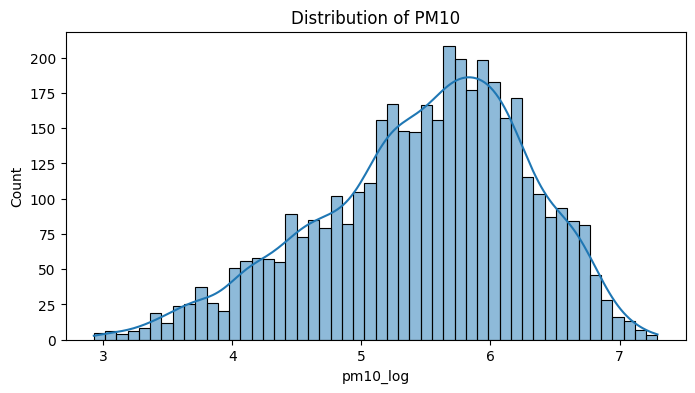

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(uploaded_df['pm10_log'], bins=50, kde=True)
plt.title('Distribution of PM10')

In [ ]:
# General info
print("\nDataframe info:")
uploaded_df.info()


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype                  
---  ------       --------------  -----                  
 0   timestamp    4104 non-null   datetime64[us, Etc/UTC]
 1   pm2_5        4104 non-null   float64                
 2   pm10         4104 non-null   float64                
 3   no2          4104 non-null   float64                
 4   no           4104 non-null   float64                
 5   so2          4104 non-null   float64                
 6   o3           4104 non-null   float64                
 7   co           4104 non-null   float64                
 8   nh3          4104 non-null   float64                
 9   aqi          4104 non-null   int64                  
 10  temp         4104 non-null   float64                
 11  dewpoint     4104 non-null   float64                
 12  relhumidity  4104 non-null   float64                
 13  w

### Line plot over time
Detects spikes: Sudden increases may indicate pollution events like dust storms, traffic surges, or factory activity.

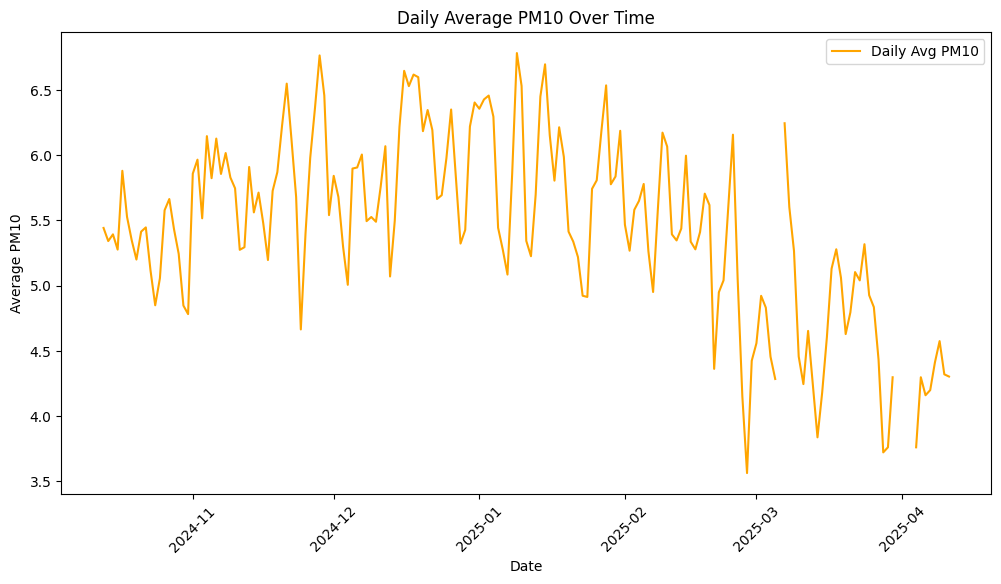

In [ ]:
# Resample to daily mean and plot
daily_data = uploaded_df.resample('D', on='timestamp').mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['pm10_log'], label="Daily Avg PM10", color='orange')
plt.xlabel("Date")
plt.ylabel("Average PM10")
plt.title("Daily Average PM10 Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Correlation Heatmap

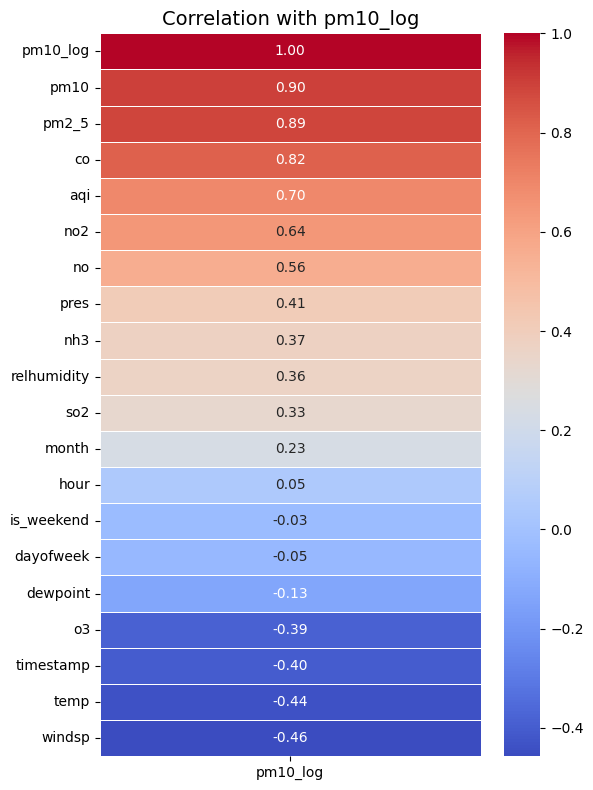

In [ ]:
# Calculate the correlation matrix
correlation = uploaded_df.corr()

# Focus only on pm10-log correlations
pm10_corr = correlation[["pm10_log"]].sort_values(by="pm10_log", ascending=False)

# Plotting the correlations with pm10-log in a heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(pm10_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation with pm10_log", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Engineering and Pre-Processing

### Timestamp Granularity

🔍 Why?
Helps us:

Analyze temporal patterns (e.g., higher PM at night?)

Use time features in ML model (lag effects, time of day, etc.)



In [ ]:
import pandas as pd

uploaded_df["timestamp"] = pd.to_datetime(uploaded_df["timestamp"])
uploaded_df = uploaded_df.dropna()

uploaded_df["hour"] = uploaded_df["timestamp"].dt.hour
uploaded_df['month'] = uploaded_df['timestamp'].dt.month
uploaded_df["dayofweek"] = uploaded_df["timestamp"].dt.dayofweek
uploaded_df["is_weekend"] = uploaded_df["dayofweek"].isin([5, 6]).astype(int)

In [ ]:
lags = [1, 3, 6, 24]               # in hours
windows = [3, 6, 12, 24]           # rolling window (hourly basis)

for lag in lags:
    uploaded_df[f"pm10_log_lag{lag}"] = uploaded_df["pm10_log"].shift(lag)

for window in windows:
    uploaded_df[f"pm10_log_rollmean{window}"] = uploaded_df["pm10_log"].rolling(window=window).mean()

# Drop initial rows with NaNs from lag/rolling features
df = uploaded_df.dropna().reset_index(drop=True)

In [ ]:
# General info
print("\nDataframe info:")
uploaded_df.info()


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype                  
---  ------               --------------  -----                  
 0   timestamp            4104 non-null   datetime64[us, Etc/UTC]
 1   pm2_5                4104 non-null   float64                
 2   pm10                 4104 non-null   float64                
 3   no2                  4104 non-null   float64                
 4   no                   4104 non-null   float64                
 5   so2                  4104 non-null   float64                
 6   o3                   4104 non-null   float64                
 7   co                   4104 non-null   float64                
 8   nh3                  4104 non-null   float64                
 9   aqi                  4104 non-null   int64                  
 10  temp                 4104 non-null   float64                
 11  dewpoint     

### Feature Selection Based on Correlation with PM10

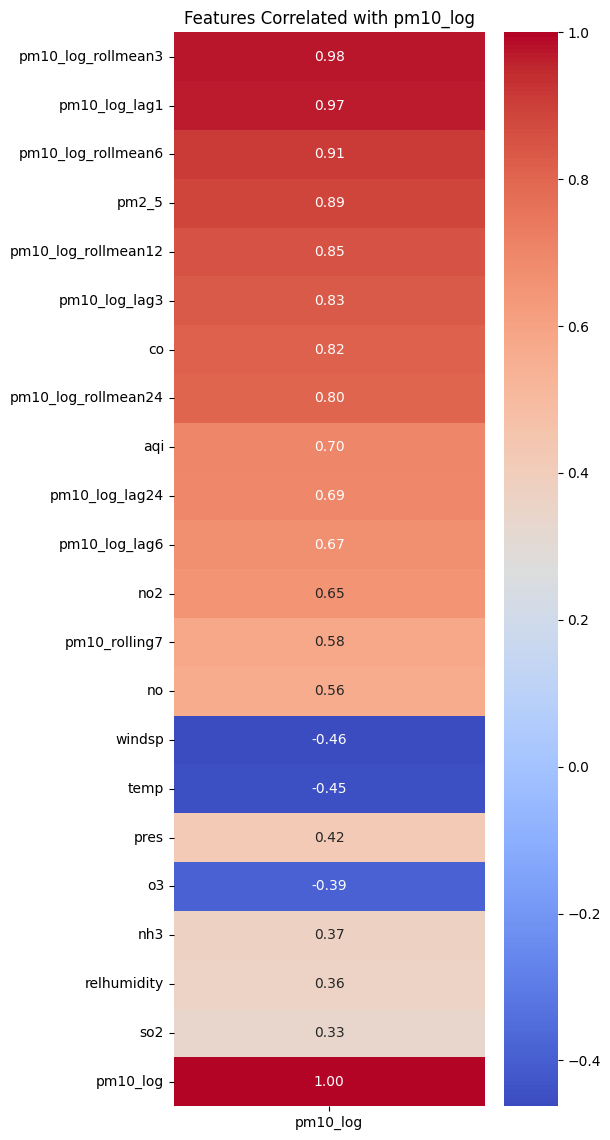


 Selected features based on correlation with pm10_log:
['pm10_log_rollmean3', 'pm10_log_lag1', 'pm10_log_rollmean6', 'pm2_5', 'pm10_log_rollmean12', 'pm10_log_lag3', 'co', 'pm10_log_rollmean24', 'aqi', 'pm10_log_lag24', 'pm10_log_lag6', 'no2', 'pm10_rolling7', 'no', 'windsp', 'temp', 'pres', 'o3', 'nh3', 'relhumidity', 'so2']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop timestamp for correlation calculation
corr_df = df.drop(columns=["timestamp", "pm10"])  # keep pm10_log

# Correlation with target (pm10_log)
correlation = corr_df.corr()
pm10_corr = correlation["pm10_log"].sort_values(key=abs, ascending=False)

# Select features with abs(correlation) > 0.3 (threshold adjustable)
selected_features = pm10_corr[pm10_corr.abs() > 0.3].drop("pm10_log").index.tolist()

# Display heatmap of selected features
plt.figure(figsize=(6, len(selected_features) * 0.5 + 1))
sns.heatmap(df[selected_features + ["pm10_log"]].corr()[["pm10_log"]], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Features Correlated with pm10_log")
plt.tight_layout()
plt.show()

print("\n Selected features based on correlation with pm10_log:")
print(selected_features)


In [ ]:
from hsfs.feature_group import FeatureGroup

pollution_fg = fs.create_feature_group(
    name="pm10_pre_processed_dataset",
    version=2,
    description="Engineered air pollution features for PM10 prediction",
    primary_key=["timestamp"],
    event_time="timestamp"
)


In [ ]:
pollution_fg.insert(uploaded_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1221781/fs/1210435/fg/1435112


Uploading Dataframe: 100.00% |██████████| Rows 4104/4104 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: pm10_pre_processed_dataset_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1221781/jobs/named/pm10_pre_processed_dataset_2_offline_fg_materialization/executions


(Job('pm10_pre_processed_dataset_2_offline_fg_materialization', 'SPARK'), None)

## Fetching preprocessed dataset


In [ ]:
# Retrieve the feature group data
fg = fs.get_feature_group("pm10_pre_processed_dataset", version=2)

# Now read the data
uploaded_df = fg.read()

uploaded_df.info()
print(f"\nNumber of records in feature store: {len(uploaded_df)}")

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.97s) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype                  
---  ------               --------------  -----                  
 0   timestamp            4104 non-null   datetime64[us, Etc/UTC]
 1   pm2_5                4104 non-null   float64                
 2   pm10                 4104 non-null   float64                
 3   no2                  4104 non-null   float64                
 4   no                   4104 non-null   float64                
 5   so2                  4104 non-null   float64                
 6   o3                   4104 non-null   float64                
 7   co                   4104 non-null   float64                
 8   nh3                  4104 non-null   float64                
 9   aqi                  4104 non-null   int64                  
 10  temp      

In [ ]:
uploaded_df = uploaded_df.sort_values(by='timestamp')
uploaded_df = uploaded_df.reset_index(drop=True)
print(uploaded_df.head(10))

                  timestamp   pm2_5    pm10     no2      no    so2      o3  \
0 2024-10-13 22:00:00+00:00  161.22  211.95  100.08    7.71  14.66    0.18   
1 2024-10-13 23:00:00+00:00  194.33  249.47  111.04    8.83  15.14    0.03   
2 2024-10-14 00:00:00+00:00  251.69  312.30  132.98   12.74  17.88    0.00   
3 2024-10-14 01:00:00+00:00  313.72  377.93  152.17   17.43  20.98    0.00   
4 2024-10-14 02:00:00+00:00  360.37  430.05  139.83   39.34  21.46    0.46   
5 2024-10-14 03:00:00+00:00  408.82  486.99  127.49   86.72  23.13    4.74   
6 2024-10-14 04:00:00+00:00  439.67  517.95  141.20  109.08  25.75   13.41   
7 2024-10-14 05:00:00+00:00  489.22  570.06  202.89   76.00  28.61   44.35   
8 2024-10-14 06:00:00+00:00  568.86  654.24  235.80   30.85  30.99  147.34   
9 2024-10-14 07:00:00+00:00  119.68  147.02   38.04    3.07  35.29  220.30   

        co    nh3  aqi  ...  pm10_log  pm10_rolling7  pm10_log_lag1  \
0  3524.78  30.15    5  ...  5.361057            NaN            NaN   

## Handling Missing vals

In [ ]:
# Check for missing values after preprocessing
print(uploaded_df.isnull().sum())

timestamp                0
pm2_5                    0
pm10                     0
no2                      0
no                       0
so2                      0
o3                       0
co                       0
nh3                      0
aqi                      0
temp                     0
dewpoint                 0
relhumidity              0
windsp                   0
pres                     0
hour                     0
dayofweek                0
is_weekend               0
month                    0
pm10_log                 0
pm10_rolling7          167
pm10_log_lag1            1
pm10_log_lag3            3
pm10_log_lag6            6
pm10_log_lag24          24
pm10_log_rollmean3       2
pm10_log_rollmean6       5
pm10_log_rollmean12     11
pm10_log_rollmean24     23
dtype: int64


In [ ]:
clean_df = uploaded_df.dropna().reset_index(drop=True)
clean_df = clean_df.sort_values(by='timestamp')

In [ ]:
# Check for missing values after preprocessing
print(clean_df.isnull().sum())

timestamp              0
pm2_5                  0
pm10                   0
no2                    0
no                     0
so2                    0
o3                     0
co                     0
nh3                    0
aqi                    0
temp                   0
dewpoint               0
relhumidity            0
windsp                 0
pres                   0
hour                   0
dayofweek              0
is_weekend             0
month                  0
pm10_log               0
pm10_rolling7          0
pm10_log_lag1          0
pm10_log_lag3          0
pm10_log_lag6          0
pm10_log_lag24         0
pm10_log_rollmean3     0
pm10_log_rollmean6     0
pm10_log_rollmean12    0
pm10_log_rollmean24    0
dtype: int64


In [ ]:
print(clean_df.head(10))

print(f"\nNumber of records in feature store: {len(clean_df)}")

                  timestamp   pm2_5    pm10     no2     no    so2      o3  \
0 2024-10-20 21:00:00+00:00  133.63  188.13   39.41   0.34  11.56   10.37   
1 2024-10-20 22:00:00+00:00  124.55  171.24   33.24   0.31   9.78   10.19   
2 2024-10-20 23:00:00+00:00  124.22  166.36   31.87   0.73   8.94    5.99   
3 2024-10-21 00:00:00+00:00  130.47  169.70   32.56   2.26   8.46    2.15   
4 2024-10-21 01:00:00+00:00  139.89  178.06   32.56   6.65   8.58    0.41   
5 2024-10-21 02:00:00+00:00  167.65  211.65   37.70  25.03  11.80    0.13   
6 2024-10-21 03:00:00+00:00  210.62  263.69   48.67  60.80  15.74    1.72   
7 2024-10-21 04:00:00+00:00  231.58  287.33   65.80  70.63  18.12    7.78   
8 2024-10-21 05:00:00+00:00  245.06  300.47   93.22  45.60  19.31   30.04   
9 2024-10-21 06:00:00+00:00  269.66  322.62  101.45  17.66  20.50  104.43   

        co    nh3  aqi  ...  pm10_log  pm10_rolling7  pm10_log_lag1  \
0  1602.17  72.96    5  ...  5.242435       5.427365       5.342239   
1  1441.96

## Model Training

### Targets and features

In [ ]:
# Drop timestamp as it's not a feature
clean_df = clean_df.drop(columns=["timestamp"])

target = 'pm10_log'

features = ['pm10_log_rollmean3', 'pm10_log_lag1', 'pm10_log_rollmean6', 'pm2_5',
            'pm10_log_rollmean12', 'pm10_log_lag3', 'co', 'pm10_log_rollmean24',
            'aqi', 'pm10_log_lag24', 'pm10_log_lag6', 'no2', 'pm10_rolling7',
            'no', 'windsp', 'temp', 'pres', 'o3', 'nh3', 'relhumidity', 'so2']
split_ratio = 0.8
split_index = int(len(clean_df) * split_ratio)

X = clean_df[features]
y = clean_df['pm10_log']

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict and inverse log transformation
y_pred_log = rf_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
accuracy = 100 - np.mean(np.abs((y_actual - y_pred) / (y_actual + 1e-6))) * 100  # avoid div by zero

# Results
print("Random Forest Regressor:")
print(f"  - Mean Squared Error (on actual PM10): {rmse:.2f}")
print(f"  - Mean Absolute Error: {mae:.2f}")
print(f"  - R² Score: {r2:.3f}")
print(f"  - Accuracy ≈ {accuracy:.2f}%")


Random Forest Regressor:
  - Mean Squared Error (on actual PM10): 12.93
  - Mean Absolute Error: 9.83
  - R² Score: 0.990
  - Accuracy ≈ 89.13%


In [ ]:
import shap
explainer_rf = shap.Explainer(rf_model)

# Get SHAP values for test set
shap_values_rf = explainer_rf(X_test)


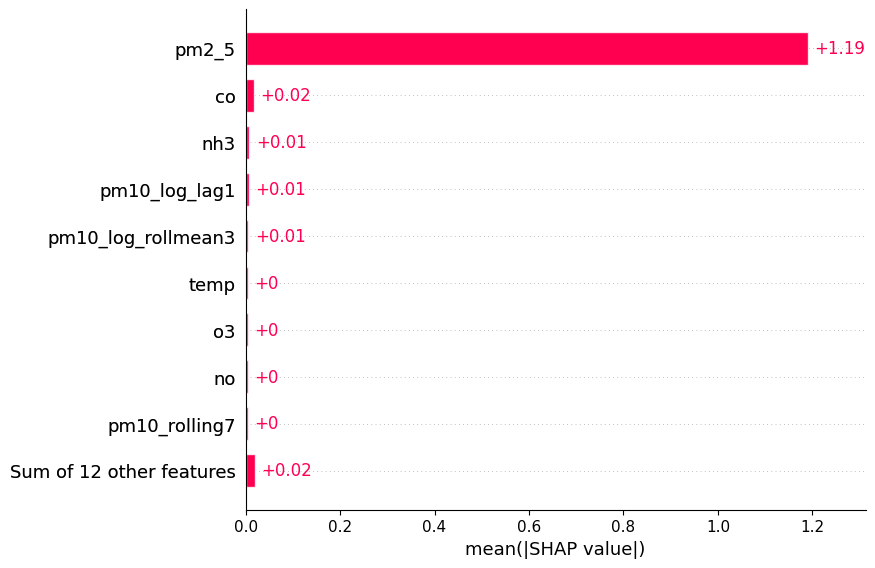

In [ ]:
shap.plots.bar(shap_values_rf)

In [ ]:
import numpy as np
import pandas as pd

mean_abs_shap_rf = np.abs(shap_values_rf.values).mean(axis=0)
shap_importance_rf = pd.DataFrame({
    "feature": X_test.columns,
    "importance": mean_abs_shap_rf
}).sort_values(by="importance", ascending=False)

print(shap_importance_rf)


                feature  importance
3                 pm2_5    1.190695
6                    co    0.017125
18                  nh3    0.008190
1         pm10_log_lag1    0.006194
0    pm10_log_rollmean3    0.005633
15                 temp    0.004790
17                   o3    0.004563
13                   no    0.004081
12        pm10_rolling7    0.004077
11                  no2    0.003656
8                   aqi    0.003430
7   pm10_log_rollmean24    0.002033
16                 pres    0.001641
10        pm10_log_lag6    0.001599
9        pm10_log_lag24    0.001556
4   pm10_log_rollmean12    0.001443
20                  so2    0.001373
19          relhumidity    0.001067
2    pm10_log_rollmean6    0.000961
5         pm10_log_lag3    0.000730
14               windsp    0.000455


### XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict in log scale
test_preds_log = xgb_model.predict(X_test)

# Inverse transform
test_preds = np.expm1(test_preds_log)
y_test_actual = np.expm1(y_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_actual, test_preds))
mae = mean_absolute_error(y_test_actual, test_preds)
r2 = r2_score(y_test_actual, test_preds)
accuracy = 100 - np.mean(np.abs((y_test_actual - test_preds) / (y_test_actual + 1e-6))) * 100

# Print results
print("XGBoost:")
print(f"  - RMSE: {rmse:.2f}")
print(f"  - MAE: {mae:.2f}")
print(f"  - R² Score: {r2:.3f}")
print(f"  - Accuracy ≈ {accuracy:.2f}%")


XGBoost:
  - RMSE: 11.37
  - MAE: 8.79
  - R² Score: 0.992
  - Accuracy ≈ 90.36%


In [ ]:
import shap

# Initialize SHAP explainer for tree-based model
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values
shap_values = explainer(X_test)

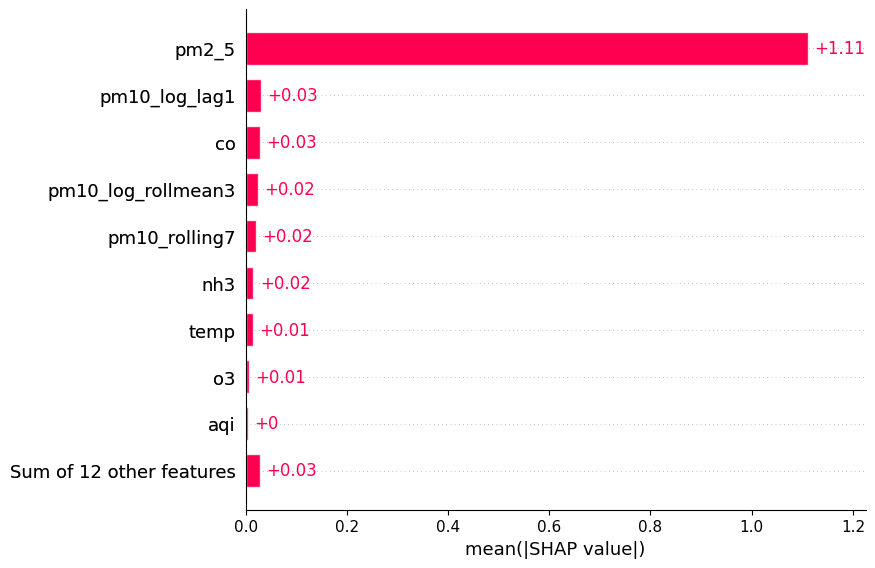

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
import numpy as np
import pandas as pd
# Mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
shap_importance = pd.DataFrame({
    "feature": X_test.columns,
    "importance": mean_abs_shap
}).sort_values(by="importance", ascending=False)

print(shap_importance)

                feature  importance
3                 pm2_5    1.111209
1         pm10_log_lag1    0.029877
6                    co    0.028534
0    pm10_log_rollmean3    0.024716
12        pm10_rolling7    0.020354
18                  nh3    0.015292
15                 temp    0.014729
17                   o3    0.006159
8                   aqi    0.004915
16                 pres    0.004369
11                  no2    0.004074
13                   no    0.003623
19          relhumidity    0.002625
20                  so2    0.002528
7   pm10_log_rollmean24    0.002482
5         pm10_log_lag3    0.002057
9        pm10_log_lag24    0.001658
4   pm10_log_rollmean12    0.001486
14               windsp    0.001324
10        pm10_log_lag6    0.001263
2    pm10_log_rollmean6    0.000747


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ----------------------------
# 1. Preprocessing
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 2. Ridge Regression
# ----------------------------
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)  # y_train should be pm10_log

# ----------------------------
# 3. Predictions
# ----------------------------
y_pred_log = ridge.predict(X_test_scaled)

# Inverse log1p to get back original PM10 values
y_pred_pm10 = np.expm1(y_pred_log)
y_test_pm10 = np.expm1(y_test)  # y_test is still in log scale

# ----------------------------
# 4. Evaluation
# ----------------------------
rmse = np.sqrt(mean_squared_error(y_test_pm10, y_pred_pm10))
mae = mean_absolute_error(y_test_pm10, y_pred_pm10)
r2 = r2_score(y_test_pm10, y_pred_pm10)

# Accuracy based on Mean Absolute Percentage Error (MAPE)
accuracy = 100 - np.mean(np.abs((y_test_pm10 - y_pred_pm10) / (y_test_pm10 + 1e-6))) * 100

print("\n Ridge Regression (Original PM10 Scale):")
print(f"  - Mean Squared Error: {rmse:.2f}")
print(f"  - Mean Absolute Error: {mae:.2f}")
print(f"  - R²: {r2:.2f}")
print(f"  - Accuracy ≈ {accuracy:.2f}%")



 Ridge Regression (Original PM10 Scale):
  - Mean Squared Error: 19.40
  - Mean Absolute Error: 9.59
  - R²: 0.98
  - Accuracy ≈ 91.44%


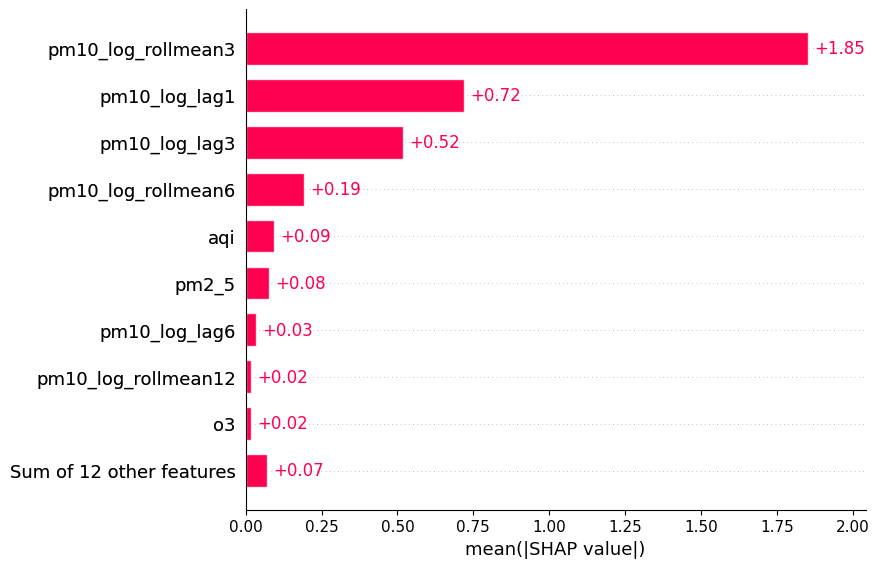

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP expects raw (non-scaled) data to make interpretation meaningful
# So we pass X_train (non-scaled), but also inform SHAP that we used a scaler
explainer = shap.Explainer(ridge, X_train_scaled, feature_names=X_train.columns)

# Compute SHAP values
shap_values = explainer(X_test_scaled)

# Summary plot (bar: overall feature importance)
shap.plots.bar(shap_values, max_display=10)


In [ ]:
import numpy as np
import pandas as pd

# Compute mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame for feature importance
shap_importance = pd.DataFrame({
    "feature": X_test.columns,
    "importance": mean_abs_shap
}).sort_values(by="importance", ascending=False)

# Display the ranked feature importance
print(shap_importance)

                feature  importance
0    pm10_log_rollmean3    1.851943
1         pm10_log_lag1    0.717609
5         pm10_log_lag3    0.518042
2    pm10_log_rollmean6    0.192215
8                   aqi    0.092270
3                 pm2_5    0.077377
10        pm10_log_lag6    0.033425
4   pm10_log_rollmean12    0.018218
17                   o3    0.017749
16                 pres    0.013101
6                    co    0.009896
19          relhumidity    0.008804
14               windsp    0.007785
13                   no    0.006736
9        pm10_log_lag24    0.006630
12        pm10_rolling7    0.006114
20                  so2    0.005453
18                  nh3    0.002514
7   pm10_log_rollmean24    0.001866
11                  no2    0.001509
15                 temp    0.000204


### LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Normalize the features and target
scaler = MinMaxScaler(feature_range=(0, 1))
clean_df[features] = scaler.fit_transform(clean_df[features])
clean_df[target] = scaler.fit_transform(clean_df[[target]])

# Create sequences of length n_input
n_input = 24  # Number of previous hours to predict the next hour
X, y = [], []

for i in range(n_input, len(clean_df)):
    X.append(clean_df[features].iloc[i-n_input:i].values)  # Collect the last n_input rows for features
    y.append(clean_df[target].iloc[i])  # Target is the next value

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Train-test split (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (3130, 24, 21), Test data shape: (783, 24, 21)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
lstm_model = Sequential()

# Add LSTM layer
lstm_model.add(LSTM(64, activation='relu', input_shape=(n_input, len(features)), return_sequences=False))

# Add Dropout for regularization
lstm_model.add(Dropout(0.2))

# Output layer to predict pm10_log (1 unit)
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summarize the model architecture
lstm_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,081 (86.25 KB)

 Trainable params: 22,081 (86.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions with the LSTM model
y_pred_log = lstm_model.predict(X_test)

# Inverse the log transformation for the predicted and actual values
y_pred = np.expm1(y_pred_log)  # Use np.expm1 to reverse the log transformation on predictions
y_actual = np.expm1(y_test)    # Apply np.expm1 to the actual values from the test set

# Calculate the numerical metrics
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

# Print the evaluation metrics
print(f"LSTM Model Evaluation:")
print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
print(f"  - Mean Squared Error (MSE): {mse:.2f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  - R-squared (R2): {r2:.3f}")

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0010 - val_loss: 0.0044
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.1941e-04 - val_loss: 0.0036
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.4270e-04 - val_loss: 0.0040
Epoch 9/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 9.6890e-04 - val_loss: 0.0039
Epoch 10/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0010 - val_loss: 0.0034
Epoch 11/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 12/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

## Model Registry

In [ ]:
import joblib
import hsml

# Save the trained Ridge model locally
joblib.dump(ridge, 'ridge_model.pkl')

# Connect to Hopsworks Model Registry
project = hopsworks.login()
model_registry = project.get_model_registry()

# Create a new model entry in the registry
ridge_model = model_registry.python.create_model(
    name="pm10_ridge_model",
    metrics={"rmse": rmse, "mae": mae, "r2": r2},
    description="Ridge regression model for PM10 prediction using weather features"
)

# Upload the model file to the registry
ridge_model.save("ridge_model.pkl")


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1221781


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading /content/ridge_model.pkl: 0.000%|          | 0/720 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1221781/models/pm10_ridge_model/1


Model(name: 'pm10_ridge_model', version: 1)